In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame

import random

import sys
%matplotlib inline

In [58]:
class classic_Mersenne_Twister:


    def create_seed(self, seed):
        
        #Creates a seed for PRNG state
        self.mt[0] = seed
        for i in range(1, 624):
            self.mt[i] = self.get32bitInteger(0x6c078965*(self.mt[i - 1]^(self.mt[i -1] >> 30)) + i)


    def generate_internal_state(self, seed):
        
        #Creates a list and a seed
        self.mt = [0 for i in range(624)]
        self.index = 624
        
        #Check for valid input
        if seed is not None:
            self.create_seed(seed)
        
        self.twist()


    def extract_a_random_32bit_sequence(self):

        #Extracts a random 32bit sequence
        if self.index >= 624:
            self.twist()

        #Shuffles bits around
        x = self.mt[self.index]
        x ^= x >> 11
        x ^= (x << 7) & 0x9d2c5680
        x ^= (x << 15) & 0xefc60000
        x ^= x >> 18
    
        self.index += 1
        
        #Return a random sequence
        return self.get32bitInteger(x)


    def twist(self):
        #Advances internal state a single step
    
        for i in range(624):
            upper = 0x80000000
            lower = 0x7fffffff
        
            x = self.get32bitInteger((self.mt[i] & upper) + (self.mt[(i + 1) % 624] & lower))
            self.mt[i] = self.mt[(i+397) % 624]^(x >> 1)
        
            if x & 1 !=0:
                self.mt[i] ^= 0x9908b0df
        
            self.index = 0
        
        
    def get32bitInteger(self, x):
        return x & 0xffffffff

    
    def get624bitInteger(self, x):
        return x


    def getPseudorandomIntegers(self, x, repeats):
        
        i=0
        newlist=[]
        while i<repeats:
            number1 = self.extract_a_random_32bit_sequence()
            number2 = self.extract_a_random_32bit_sequence()
            list1 = [int (i) for i in str(number1)]
            list2 = [int (i) for i in str(number2)]
            substractedlist = [x1 - x2 for (x1, x2) in zip(list1, list2)]
            newlist = newlist + substractedlist
            i+=1
        return newlist


    def getPositivePseudorandomIntegers(self, x, repeats):
        
        i=0
        newlist=[]
        while i<repeats:
            number1 = self.extract_a_random_32bit_sequence()
            list1 = [int (i) for i in str(number1)]
            newlist = newlist +list1
            i+=1
        return newlist


    def getSequenceOfRealNumbers_c(self, x, repeats):
        
        i=0
        newlist=[]
        while i<repeats:
            number1 = self.extract_a_random_32bit_sequence()
            realnumber1 = float(number1 / 10**(len(str(number1))))
            newlist.append(realnumber1)
            i+=1
        return newlist


    def getSequenceOfRealNumbers_d(self, x, repeats):
        
        i=0
        newlist=[]
        while i<repeats:
            number1 = self.extract_a_random_32bit_sequence()
            realnumber1 = float(number1 / 10**(len(str(number1))))
            number2 = self.extract_a_random_32bit_sequence()
            realnumber2 = float(number2 / 10**(len(str(number2))))
            realnumber3 = realnumber1 - realnumber2
            newlist.append(realnumber3)
            i+=1
        return newlist


    def getPseudorandomOscillation(self, x, repeats):
        
        i=0
        num = 0
        newlist=[]
        while i<repeats:
            number1 = self.extract_a_random_32bit_sequence()
            list1 = [int (i) for i in str(number1)]

            for x in list1:
                if (x % 2) == 0:
                    num = 1
                else:
                    num = -1
                newlist.append(num)
            return newlist




In [59]:
#Test 
class a:
    test = classic_Mersenne_Twister()
    
    
    #Generates a pseudorandom state
    #Add an integer to ()
    test.generate_internal_state(1)
    test.twist()
    test.twist()
    
    # Picks a sequence
    print("Test numbers:")
    testnumber1 = test.extract_a_random_32bit_sequence()
    print(testnumber1)
    
    testnumber2 = test.extract_a_random_32bit_sequence()
    print(testnumber2)
    
    
    #Sequences split into Lists
    print("Test lists:")
    testlist1 = [int (i) for i in str(testnumber1)]
    testlist2 = [int (i) for i in str(testnumber2)]
    print(type(testlist1))
    

    print(testlist1)
    print(testlist2)
    
    x = 3
    repeats = 5
    

    # näistä vois tehä funktioita jotka palauttaa noi kyseiset arvot nii niitä vois kutsua muualta
    def getInts(self):
        # a) Sequence of pseudorandom integers
        testsequence = a.test.getPseudorandomIntegers(a.x, a.repeats)
        print("a)")
        return testsequence
    def getPosInts(self):
        # b) Sequence of positive pseudorandom integers
        testsequence = a.test.getPositivePseudorandomIntegers(a.x, a.repeats)
        print("b) ")
        return testsequence
    def getReals01(self):
        # c) Sequence of pseudorandom realnumbers [0,1)
        testsequence = a.test.getSequenceOfRealNumbers_c(a.x, a.repeats)
        print("c)")
        return testsequence
    def getReals02(self):
        # d) Sequence of pseudorandom realnumbers (-1,1)
        testsequence = a.test.getSequenceOfRealNumbers_d(a.x, a.repeats)
        print("d)")
        return testsequence
    def getOnes(self):
        # e) Sequence of pseudorandom oscillation of 1 and -1 at 50-50 probability
        testsequence = a.test.getPseudorandomOscillation(a.x, a.repeats)
        print("e)")
        return testsequence


Test numbers:
3239719367
3879348080
Test lists:
<class 'list'>
[3, 2, 3, 9, 7, 1, 9, 3, 6, 7]
[3, 8, 7, 9, 3, 4, 8, 0, 8, 0]


In [62]:
t=a()

Ints = t.getInts()
PosInts = t.getPosInts()
Reals01 = t.getReals01()
Reals02 = t.getReals02()
Ones = t.getOnes()

binssit = 20

a)
b) 
c)
d)
e)


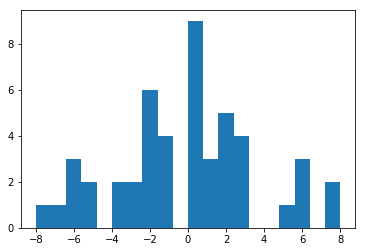

In [63]:
kuva1 = plt.hist(Ints, bins=binssit)

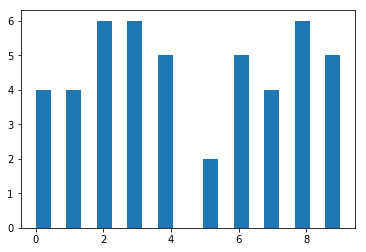

In [64]:
kuva2 = plt.hist(PosInts, bins=binssit)

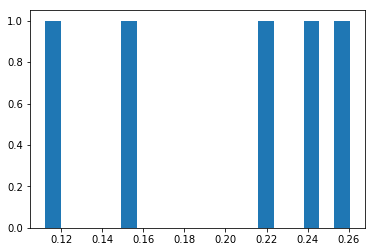

In [65]:
kuva3 = plt.hist(Reals01, bins=binssit)

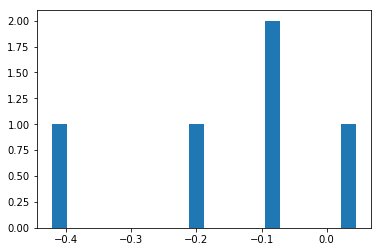

In [66]:
kuva4 = plt.hist(Reals02, bins=binssit)

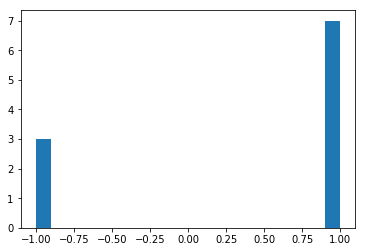

In [67]:
kuva5 = plt.hist(Ones, bins=binssit)